In [1]:
import sys
import os
import torch
from matplotlib import pyplot as plt
from time import time
import numpy as np
os.chdir("..")
os.chdir("..")
from src.cpwc.tools.ptychography import Ptychography
from src.cpwc.tools.u_electron_microscopy import initialize_physical_params, get_proj, get_ring_average
from src.cpwc.tools.u_ptychography import get_overlap_img,get_overlap_area

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize object
max_scale = 9
max_probe_size = 128
max_shift = 96
device = 'cuda'

In [3]:
linop = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)
image = np.load('samples/potential.npy')
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
image_tensor_ = torch.exp(1j * image_tensor)

In [4]:
m = linop.apply(image_tensor_)
probe = linop.probe.cpu()

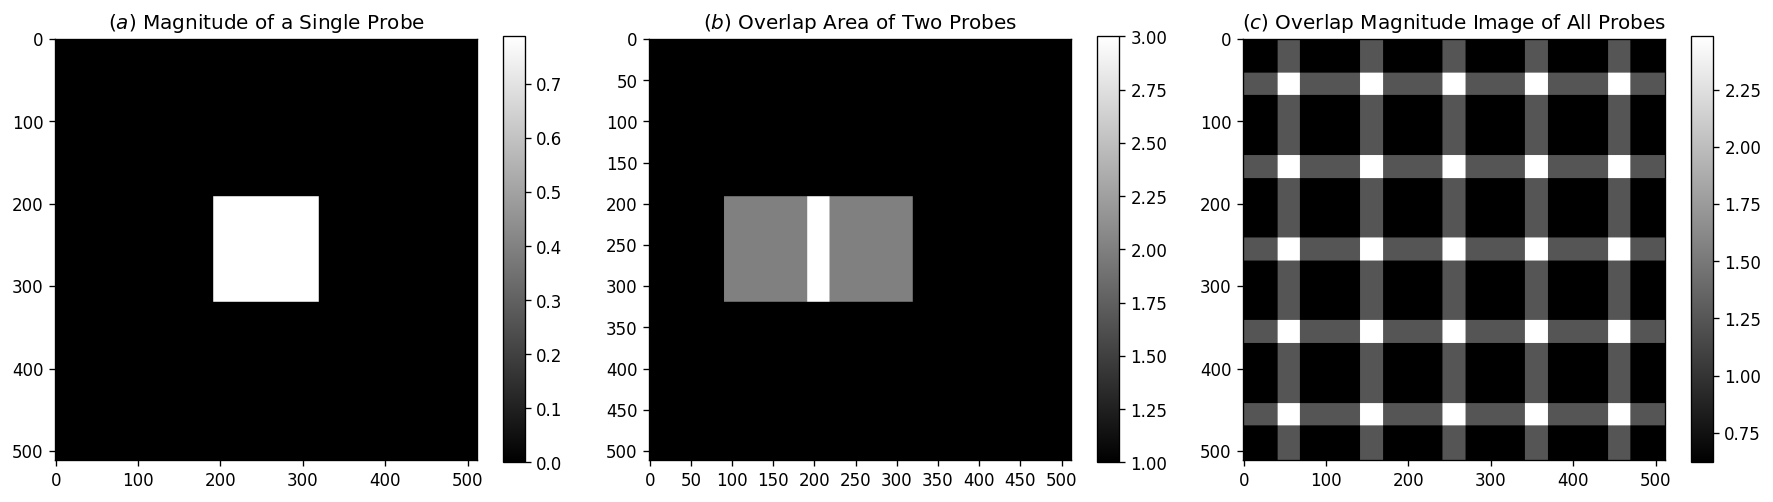

In [5]:
plt.figure(figsize=(15,4),dpi = 120)

plt.subplot(1, 3, 1)
plt.imshow(torch.abs(probe),cmap='gray')
plt.title(r"$(a)$ Magnitude of a Single Probe")
plt.colorbar()

overlap_area = get_overlap_area(probe, linop.shifts)
plt.subplot(1, 3, 2)
plt.imshow(overlap_area,cmap='gray')
plt.locator_params(axis='x', nbins=20)  # Increase number of x-axis ticks to 20
plt.locator_params(axis='y', nbins=20)
plt.title(r"$(b)$ Overlap Area of Two Probes")
plt.colorbar()

# Plot overlap img
overlap_img = get_overlap_img(linop.probe, linop.shifts, n_dim=2)
plt.subplot(1, 3, 3)
plt.imshow(overlap_img.cpu(), cmap='gray')
plt.title(r"$(c)$ Overlap Magnitude Image of All Probes")
plt.colorbar()
plt.tight_layout()
plt.show()
